In [1]:
import sys
sys.path.insert(0, "/global/homes/c/cinlima/NumCosmo/notebooks/richness_proxy/")
sys.path.insert(0, "/global/homes/c/cinlima/NumCosmo/notebooks/richness_proxy/Scripts")

#NumCosmo
from numcosmo_py import Ncm, Nc, GObject
Ncm.cfg_init()

from richness_mass_calib import create_richness_mass_calib

#Useful packages
import numpy as np
from astropy.table import Table
import matplotlib
import matplotlib.pyplot as plt

In [2]:
test_data = Table.read('CatalogsMatching/match_ID.fits')

test_data.rename_column('halo_mass', 'mass')

# test_data

In [9]:
area = 439.78987
cosmo = Nc.HICosmoDEXcdm()
cosmo.omega_x2omega_k()
cosmo.param_set_by_name("H0", 71.0)
cosmo.param_set_by_name("Omegab", 0.0448)
cosmo.param_set_by_name("Omegac", 0.2648)
cosmo.param_set_by_name("Omegak", 0.00)
cosmo.param_set_by_name("w", -1.0)

# dmr = create_richness_mass_calib(test_data, mass_col_name = 'mass', redshift_col_name = 'redshift' )
catalog_len = len(test_data)

lnM_v = Ncm.Vector.new(catalog_len)
z_v = Ncm.Vector.new(catalog_len)
rich_v = Ncm.Vector.new(catalog_len)

for i, mass in enumerate(test_data['mass']):
    lnM_v.set(i, np.log(mass))

for i, z in enumerate(test_data['redshift']):
    z_v.set(i, z)

for i, rich in enumerate(test_data['richness']):
    rich_v.set(i, np.log(rich))

dmr = Nc.DataClusterMassRich.new()
dmr.set_data(lnM_v, z_v, rich_v)

zmin = 0.0  
zmax = 1.2

# cluster_m = Nc.ClusterMassLnrichExt(use_ln1pz = True)

cluster_m = Nc.ClusterMassLnrichExt(use_ln1pz = True, lnRichness_min=0, lnRichness_max=6)
cluster_m.param_set_by_name("cut", np.log(5))

cluster_z = Nc.ClusterRedshiftNodist (z_min = zmin, z_max = zmax)

mset = Ncm.MSet.new_array([cosmo, cluster_m, cluster_z])

In [10]:
rng = Ncm.RNG.seeded_new(None, 50)

rsp = dmr.resample(mset, rng)

In [13]:
lnR_resample = dmr.props.lnR_cluster.dup_array()
lnM_resample = dmr.props.lnM_cluster.dup_array()


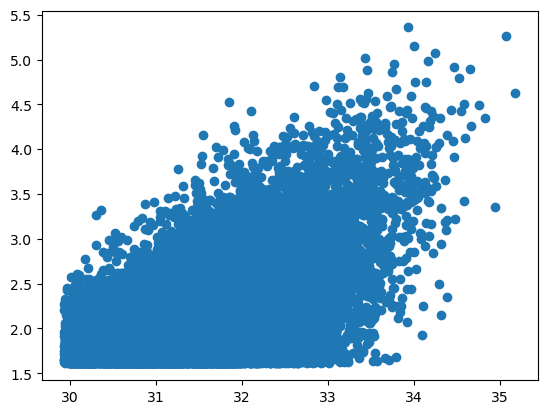

In [14]:
plt.scatter(lnM_resample, lnR_resample)

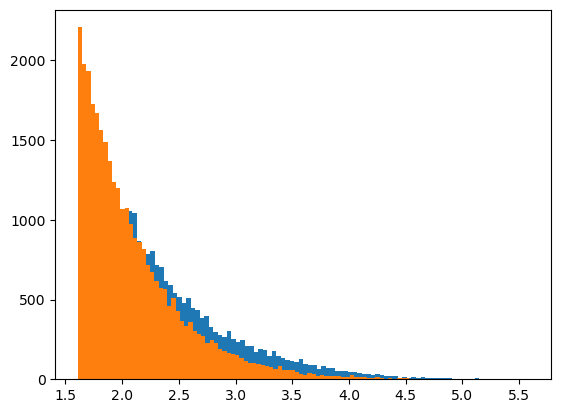

In [19]:
plt.hist(np.log(test_data['richness']), bins=100)
plt.hist(lnR_resample, bins=100)

plt.show()